In [2]:
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Reshape, Input, Flatten, Dropout
from keras.layers import LeakyReLU, Activation, BatchNormalization
from keras.layers import UpSampling2D, Conv2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import sequence
import numpy as np
import random
import matplotlib.pyplot as plt

In [9]:
g = Sequential()
g.add(Dense(units=128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
g.add(BatchNormalization())
g.add(Reshape((7,7,128)))
g.add(UpSampling2D())
g.add(Conv2D(filters=128, kernel_size=3, padding="Same"))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(0.2)))
g.add(UpSampling2D())
g.add(Conv2D(filters=1, kernel_size=3, padding="Same", activation="tanh"))

d = Sequential()
d.add(Conv2D(filters=64, kernel_size=3, strides =2, input_shape=(28,28,1), padding="Same"))
d.add(Activation(LeakyReLU(0.2)))
d.add(Dropout(0.3))
d.add(Conv2D(filters=128, kernel_size=3, strides =2, padding="Same"))
d.add(Activation(LeakyReLU(0.2)))
d.add(Dropout(0.3))
d.add(Flatten())
d.add(Dense(units=1,activation="sigmoid"))
d.compile(loss="binary_crossentropy", optimizer="adam")
d.trainable = False

gan_input = Input(shape=(100,))
x = g(gan_input)
gan_output = d(x)
gan = Model(gan_input, gan_output)
gan.compile(loss="binary_crossentropy", optimizer="adam")

In [17]:
def gan_train(epoch, batch_size, save_interval):
    (X_train, _), (_, _) = mnist.load_data()
    X_train = X_train.reshape(X_train.shape[0],28,28,1).astype("float32")
    X_train = (X_train -127.5) / 127.5
    true_label = np.ones((batch_size,1))
    fake_label = np.zeros((batch_size,1))
    
    for e in range(epoch):
        true_data = X_train[np.random.randint(0,X_train.shape[0], batch_size)]
        d_loss_real = d.train_on_batch(true_data, true_label)
        
        noise = np.random.normal(0,1,size = (batch_size,100))
        fake_data = g.predict(noise)
        d_loss_fake = d.train_on_batch(fake_data, fake_label)
        
        d_loss = 0.5* np.add(d_loss_real, d_loss_fake)
        
        g_loss = gan.train_on_batch(noise, true_label)
        
        print("EPOCH=",e+1,"D_loss=", round(d_loss,4), "\tG_loss=",round(g_loss,4))
        
        if e % save_interval == 0:
            noise = np.random.normal(0,1, (25,100))
            imgs = g.predict(noise)
            imgs = 0.5 * imgs +0.5
            
            fig, axs =plt.subplots(5,5)
            num_of_imgs = 0
            for i in range(5):
                for j in range(5):
                    axs[i,j].imshow(imgs[num_of_imgs, :, :,0], cmap="gray")
                    axs[i,j].axis("off")
                    num_of_imgs+=1

EPOCH= 1 D_loss= 0.5485 	G_loss= 0.4761
EPOCH= 2 D_loss= 0.4993 	G_loss= 0.2143
EPOCH= 3 D_loss= 0.5078 	G_loss= 0.1234
EPOCH= 4 D_loss= 0.5326 	G_loss= 0.0948
EPOCH= 5 D_loss= 0.542 	G_loss= 0.1149
EPOCH= 6 D_loss= 0.5167 	G_loss= 0.1837
EPOCH= 7 D_loss= 0.4733 	G_loss= 0.3211
EPOCH= 8 D_loss= 0.4425 	G_loss= 0.533
EPOCH= 9 D_loss= 0.4433 	G_loss= 0.7115
EPOCH= 10 D_loss= 0.4369 	G_loss= 0.7803
EPOCH= 11 D_loss= 0.4546 	G_loss= 0.7912
EPOCH= 12 D_loss= 0.5114 	G_loss= 0.787
EPOCH= 13 D_loss= 0.6739 	G_loss= 0.5408
EPOCH= 14 D_loss= 0.8641 	G_loss= 0.417
EPOCH= 15 D_loss= 0.9681 	G_loss= 0.4002
EPOCH= 16 D_loss= 0.947 	G_loss= 0.3774
EPOCH= 17 D_loss= 0.8007 	G_loss= 0.4644
EPOCH= 18 D_loss= 0.8165 	G_loss= 0.524
EPOCH= 19 D_loss= 0.684 	G_loss= 0.6073
EPOCH= 20 D_loss= 0.572 	G_loss= 0.6661
EPOCH= 21 D_loss= 0.5249 	G_loss= 0.6826
EPOCH= 22 D_loss= 0.4419 	G_loss= 0.7027
EPOCH= 23 D_loss= 0.4014 	G_loss= 0.7191
EPOCH= 24 D_loss= 0.3768 	G_loss= 0.7378
EPOCH= 25 D_loss= 0.3422 	G_loss=

EPOCH= 200 D_loss= 0.7483 	G_loss= 0.8154
EPOCH= 201 D_loss= 0.6656 	G_loss= 0.7271
EPOCH= 202 D_loss= 0.6766 	G_loss= 0.8654
EPOCH= 203 D_loss= 0.6332 	G_loss= 0.8954
EPOCH= 204 D_loss= 0.647 	G_loss= 0.9944
EPOCH= 205 D_loss= 0.6679 	G_loss= 1.0418
EPOCH= 206 D_loss= 0.585 	G_loss= 0.8385
EPOCH= 207 D_loss= 0.6209 	G_loss= 0.8842
EPOCH= 208 D_loss= 0.5995 	G_loss= 0.9624
EPOCH= 209 D_loss= 0.5983 	G_loss= 0.8295
EPOCH= 210 D_loss= 0.4624 	G_loss= 1.0585
EPOCH= 211 D_loss= 0.6051 	G_loss= 0.8907
EPOCH= 212 D_loss= 0.5704 	G_loss= 0.9237
EPOCH= 213 D_loss= 0.5929 	G_loss= 0.904
EPOCH= 214 D_loss= 0.6493 	G_loss= 0.8325
EPOCH= 215 D_loss= 0.6823 	G_loss= 0.9602
EPOCH= 216 D_loss= 0.6701 	G_loss= 0.8924
EPOCH= 217 D_loss= 0.6631 	G_loss= 0.8518
EPOCH= 218 D_loss= 0.6632 	G_loss= 0.9087
EPOCH= 219 D_loss= 0.5846 	G_loss= 0.8431
EPOCH= 220 D_loss= 0.6638 	G_loss= 0.9473
EPOCH= 221 D_loss= 0.7912 	G_loss= 0.9829
EPOCH= 222 D_loss= 0.7459 	G_loss= 1.0126
EPOCH= 223 D_loss= 0.7876 	G_loss= 0.

EPOCH= 397 D_loss= 0.362 	G_loss= 1.2881
EPOCH= 398 D_loss= 0.421 	G_loss= 1.3627
EPOCH= 399 D_loss= 0.4249 	G_loss= 1.5423
EPOCH= 400 D_loss= 0.4037 	G_loss= 1.389
EPOCH= 401 D_loss= 0.3352 	G_loss= 1.2748
EPOCH= 402 D_loss= 0.5445 	G_loss= 1.3876
EPOCH= 403 D_loss= 0.7462 	G_loss= 1.0812
EPOCH= 404 D_loss= 0.6779 	G_loss= 0.9728
EPOCH= 405 D_loss= 0.7484 	G_loss= 0.9389
EPOCH= 406 D_loss= 0.7861 	G_loss= 0.8498
EPOCH= 407 D_loss= 0.8435 	G_loss= 0.675
EPOCH= 408 D_loss= 0.6378 	G_loss= 0.7511
EPOCH= 409 D_loss= 0.7139 	G_loss= 0.6481
EPOCH= 410 D_loss= 0.8187 	G_loss= 0.6939
EPOCH= 411 D_loss= 0.8278 	G_loss= 0.6578
EPOCH= 412 D_loss= 0.816 	G_loss= 0.666
EPOCH= 413 D_loss= 0.7034 	G_loss= 0.6582
EPOCH= 414 D_loss= 0.8142 	G_loss= 0.6113
EPOCH= 415 D_loss= 0.7245 	G_loss= 0.779
EPOCH= 416 D_loss= 0.6159 	G_loss= 0.7831
EPOCH= 417 D_loss= 0.6176 	G_loss= 0.903
EPOCH= 418 D_loss= 0.64 	G_loss= 0.9938
EPOCH= 419 D_loss= 0.5013 	G_loss= 1.2464
EPOCH= 420 D_loss= 0.4603 	G_loss= 1.1763
EP

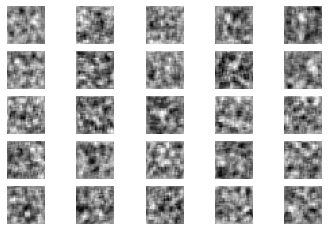

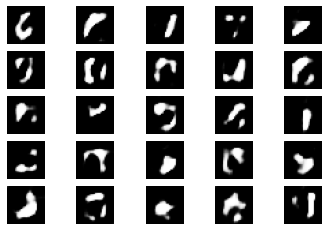

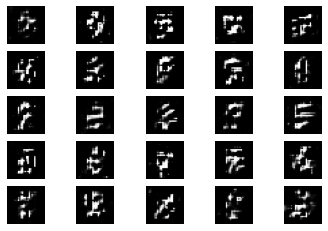

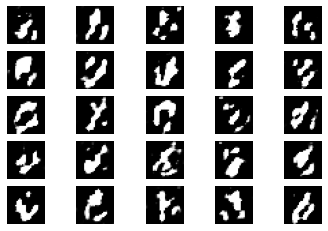

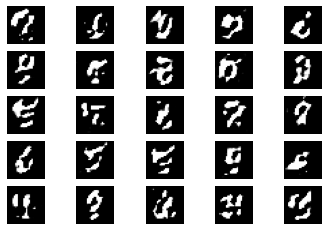

In [18]:
gan_train(500,32,100)